# Hito 1: “Análisis de canciones de Spotify”

Grupo 17, Sección 2 


Integrantes : Juan Balboa E., Sebastian Cadena A., Benjamin Fuentes R., Matias Mendez Z., Camila Rojas G.



## Introducción

Spotify es una de las plataformas de música más importantes del mundo, con más de 100 millones de canciones y cientos de millones de usuarios. Esta enorme cantidad de datos la convierte en una fuente valiosa para estudiar la música de forma científica. Lo interesante de Spotify es que cada canción tiene características medibles y objetivas como danceability (qué tan bailable es), energy (su nivel de energía), valence (si suena alegre o triste), acousticness (si es acústica o electrónica) e instrumentalness (cuánta música instrumental tiene). Estas características permiten analizar las canciones como datos numéricos y aplicar técnicas de ciencia de datos.

Este trabajo utiliza técnicas de minería de datos para explorar patrones ocultos en estas características acústicas. Específicamente, se busca descubrir si existen grupos naturales de canciones basados en sus propiedades sonoras, predecir la popularidad de las canciones, y determinar si es posible clasificar géneros musicales usando únicamente estas métricas objetivas. Los resultados ayudarán a entender mejor cómo se organiza la música y podrán presentarse como aplicaciones prácticas en sistemas de recomendación para usuarios.

Importar librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración de visualización para gráficos más atractivos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
# Suprimir advertencias para salida más limpia
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

: 

Cargar y explorar el dataset.

In [ ]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('dataset.csv')

print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print("\nPrimeras 5 filas del dataset:")
df.head()

Información general del dataset: tipos de datos, valores no nulos.

In [ ]:
print("Informacion general del dataset")
print("="*80)
df.info()
print("\n" + "="*80)

Análisis de valores faltantes


In [ ]:
# Análisis de valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje (%)': missing_percent.values
})

# Mostrar solo columnas con valores faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No hay valores faltantes en el dataset")

print("\n" + "="*80)

# problema a resolver

Regresión lineal para predecir popularidad a partir de métricas sobre la canción, sin considerar el nombre del artista.

In [23]:
# Carga de datos
file_name = 'dataset.csv'
df = pd.read_csv(file_name)
df['explicit'] = df['explicit'].astype(int)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=666)

features_to_use = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'track_genre'
]
# sets entrenamiento y prueba
y_train = train_df['popularity']
y_test = test_df['popularity']

X_train = train_df[features_to_use]
X_test = test_df[features_to_use]
# convertimos columnas de género en columnas numéricas
X_train= pd.get_dummies(X_train, columns=['track_genre'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['track_genre'], drop_first=True)


# forzamos a que ambos conjuntos tengan las mismas columnas de género

train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0
X_test = X_test[train_cols] # asegura el mismo orden



linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Absoluto Medio (MAE): 14.07172419404308
Coeficiente de Determinación (R²): 0.26154073338005457


Probamos con random forest regressor

In [24]:
# RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=666, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

rf_predictions = rf_regressor.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RandomForestRegressor - MAE: {rf_mae}")
print(f"RandomForestRegressor - R²: {rf_r2}")

#se demoro 1 min 20 segundos en correr

RandomForestRegressor - MAE: 10.403142644859185
RandomForestRegressor - R²: 0.5224642151505604


Ahora estudiamos la populariad usando random forest classifier, para lo cual convertimos la popularidad en categorías

Precisión (Accuracy): 0.7682456140350877

Reporte de Clasificación:
              precision    recall  f1-score   support

 Muy Popular       0.73      0.41      0.52      2714
Poco Popular       0.79      0.92      0.85     13465
     Popular       0.73      0.61      0.66      6621

    accuracy                           0.77     22800
   macro avg       0.75      0.64      0.68     22800
weighted avg       0.76      0.77      0.76     22800


Matriz de Confusión:


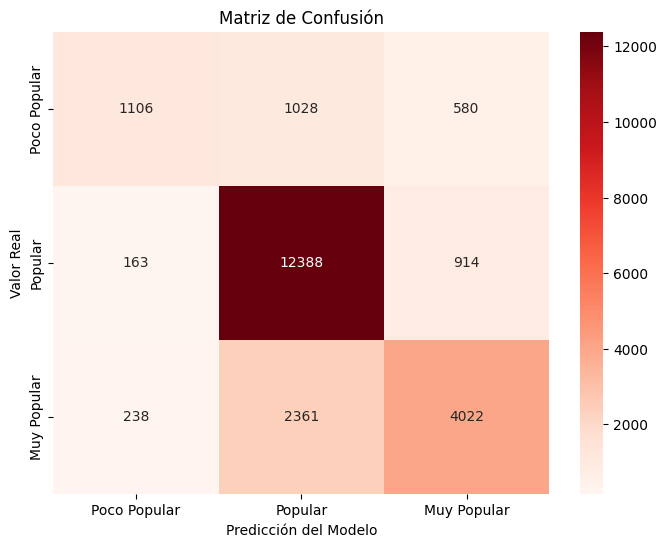

In [25]:


file_name = 'dataset.csv'
df = pd.read_csv(file_name)
# pasamos explicit a numerico
df['explicit'] = df['explicit'].astype(int)

#le damos una etiqueta a cada cancion segun su popularidad
bins = [-1, 40, 60, 101]
labels = ['Poco Popular', 'Popular', 'Muy Popular']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels)


# usamos stratify para mantener la proporción en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=666, stratify=df['popularity_category'])

features_to_use = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'track_genre'
]

# sets entrenamiento y prueba
y_train = train_df['popularity_category']
y_test = test_df['popularity_category']

X_train = train_df[features_to_use]
X_test = test_df[features_to_use]

# convertimos columnas de género en columnas numéricas
X_train = pd.get_dummies(X_train, columns=['track_genre'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['track_genre'], drop_first=True)

# forzamos a que ambos conjuntos tengan las mismas columnas de género
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
X_test = X_test[train_cols] # asegura el mismo orden


clf_model = RandomForestClassifier(n_estimators=100, random_state=666, n_jobs=-1)

clf_model.fit(X_train, y_train)

predictions = clf_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Precisión (Accuracy): {accuracy}")
print("\nReporte de Clasificación:")
print(report)


print("\nMatriz de Confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt = 'd',cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#con n_jobs=-1 se demora 12 seg. Con n_jobs=1 se demora 45 seg.